<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/series_temporales_multivariantes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

# Ignorar las advertencias
warnings.filterwarnings("ignore")

# Formato de los gráficos
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()

# Tamaño de los gráficos
sns.mpl.rc('figure', figsize=(12, 6))

# Cargar el conjunto de datos
data = sm.datasets.macrodata.load_pandas().data

# Convertir la variable de tiempo a un formato adecuado
data['year'] = data['year'].astype(str)
data['quarter'] = data['quarter'].astype(str)
data['date'] = data['year'] + 'Q' + data['quarter']

# Convertir la variable de fecha a tipo datetime
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

# Seleccionar variables relevantes para el modelo VAR y VARMA
# Ajustar según sea necesario
selected_vars = ['realgdp', 'realcons', 'realinv']

# Filtrar el conjunto de datos
data = data[selected_vars]

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Crear un modelo VAR
model_var = sm.tsa.VAR(train)

# Ajustar el modelo VAR con un orden de rezago óptimo (puede ajustar este valor)
order_var = model_var.select_order()
model_var_fitted = model_var.fit(maxlags=order_var.aic)

# Imprimir la información sobre el modelo VAR
print(model_var_fitted.summary())

# Generar pronósticos con el modelo VAR
forecast_var = model_var_fitted.forecast(train.values, steps=len(test))

# Crear un DataFrame para los pronósticos
forecast_var_df = pd.DataFrame(forecast_var, index=test.index, columns=test.columns)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
for col in data.columns:
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_var_df.index, forecast_var_df[col], label=f'Forecast {col}', linestyle='dashed')

plt.title('VAR Model Forecast')
plt.legend()
plt.show()

# Crear un modelo VARMA
model_varma = sm.tsa.VARMAX(train, order=(1, 1))

# Ajustar el modelo VARMA
model_varma_fitted = model_varma.fit(disp=False)

# Imprimir la información sobre el modelo VARMA
print(model_varma_fitted.summary())

# Generar pronósticos con el modelo VARMA
forecast_varma = model_varma_fitted.get_forecast(steps=len(test))

# Obtener los intervalos de confianza
forecast_varma_conf_int = forecast_varma.conf_int()

# Crear un DataFrame para los pronósticos y los intervalos de confianza
forecast_varma_df = pd.DataFrame(forecast_varma.predicted_mean, index=test.index, columns=test.columns)

# Visualizar los resultados con intervalos de confianza
plt.figure(figsize=(12, 6))
for col in data.columns:
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_varma_df.index, forecast_varma_df[col], label=f'Forecast {col}', linestyle='dashed')
    plt.fill_between(forecast_varma_conf_int.index, forecast_varma_conf_int[f'lower {col}'], forecast_varma_conf_int[f'upper {col}'], alpha=0.2)

plt.title('VARMA Model Forecast with Confidence Intervals')
plt.legend()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

# Ignorar las advertencias
warnings.filterwarnings("ignore")

# Formato de los gráficos
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()

# Tamaño de los gráficos
sns.mpl.rc('figure', figsize=(12, 6))

In [2]:
# Cargar el conjunto de datos
data = sm.datasets.macrodata.load_pandas().data

In [3]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
# Convertir la variable de tiempo a un formato adecuado
data['year'] = data['year'].astype(str)
data['quarter'] = data['quarter'].astype(str)
data['date'] = data['year'] + 'Q' + data['quarter']


In [5]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,date
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,1959.0Q1.0
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,1959.0Q2.0
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,1959.0Q3.0
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,1959.0Q4.0
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,1960.0Q1.0


In [9]:
# Convertir la variable de fecha a tipo datetime
data['date'] = data.apply(lambda row: pd.to_datetime(f"{int(float(row['year']))}-{int(float(row['quarter']) * 3 - 2)}", format='%Y-%m'), axis=1)
data = data.set_index('date')


In [10]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,,,
1959-01-01,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-04-01,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-07-01,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-10-01,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-01-01,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [11]:
# Seleccionar variables relevantes para el modelo VAR y VARMA
# Ajustar según sea necesario
selected_vars = ['realgdp', 'realcons', 'realinv']

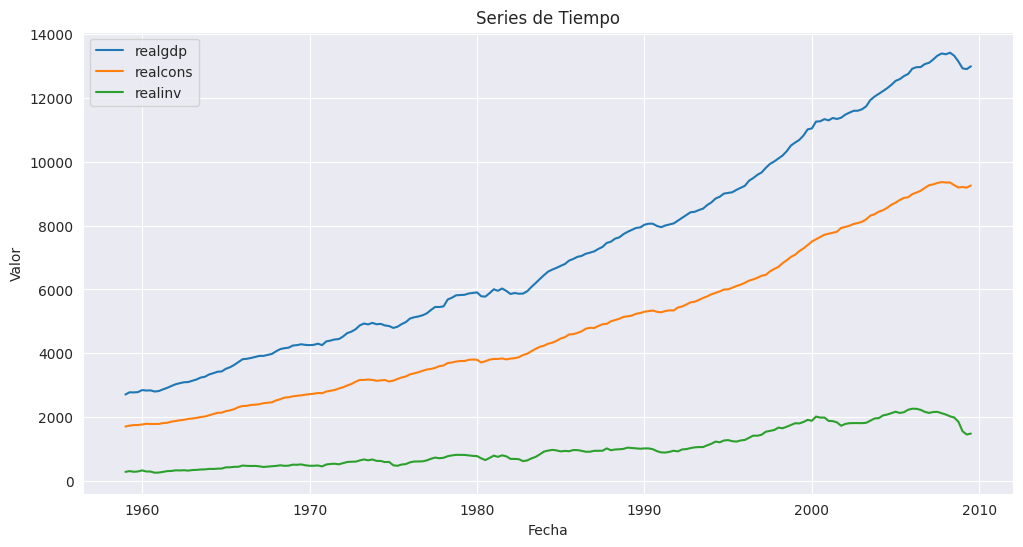

In [14]:
import matplotlib.pyplot as plt

# Graficar las series de tiempo
plt.figure(figsize=(12, 6))

for col in data.columns:
    plt.plot(data.index, data[col], label=col)

plt.title('Series de Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [15]:
# Filtrar el conjunto de datos
data = data[selected_vars]

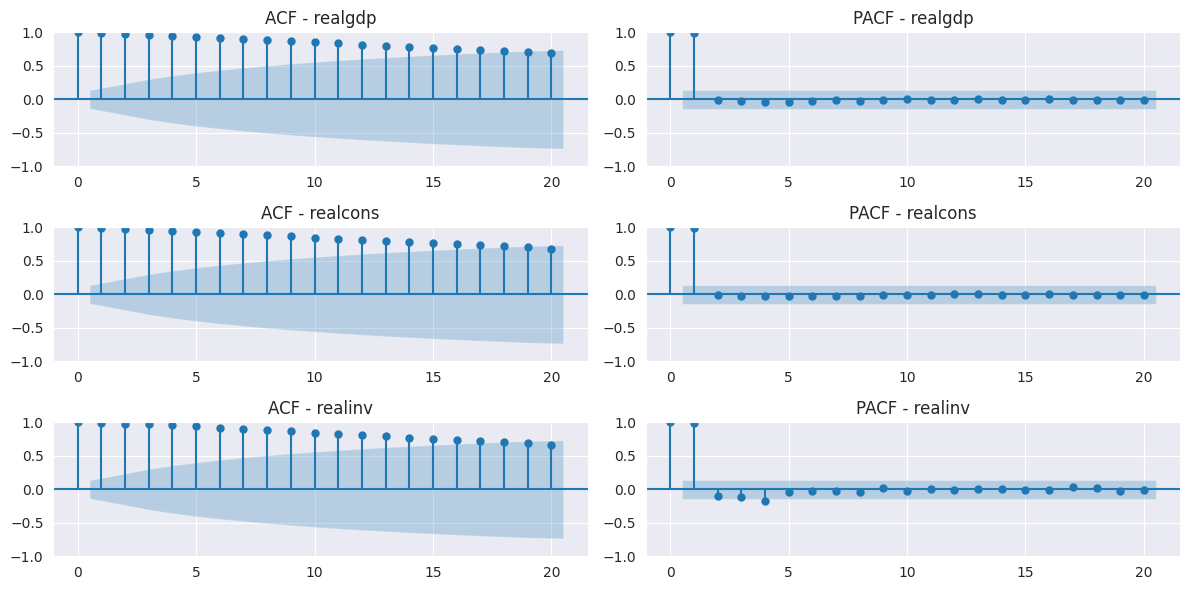

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar correlograma de autocorrelación
fig, axes = plt.subplots(nrows=len(data.columns), ncols=2, figsize=(12, 2 * len(data.columns)))

for i, col in enumerate(data.columns):
    plot_acf(data[col], ax=axes[i, 0], lags=20, title=f'ACF - {col}')
    plot_pacf(data[col], ax=axes[i, 1], lags=20, title=f'PACF - {col}')

plt.tight_layout()
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

# Definir una función para realizar la prueba Dickey-Fuller y mostrar los resultados
def test_stationarity(timeseries):
    # Realizar la prueba Dickey-Fuller:
    result = adfuller(timeseries, autolag='AIC')

    # Imprimir los resultados
    print('Resultados de la Prueba Dickey-Fuller:')
    print('Estadística de la prueba:', result[0])
    print('Valor p:', result[1])
    print('Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Comparar el valor p con el umbral común 0.05
    if result[1] <= 0.05:
        print("Conclusión: La serie de tiempo es estacionaria en media.")
    else:
        print("Conclusión: La serie de tiempo no es estacionaria en media.")

# Aplicar la prueba a cada serie de tiempo en el conjunto de datos
for col in data.columns:
    print(f'\nAnálisis de la serie de tiempo: {col}')
    test_stationarity(data[col])



Análisis de la serie de tiempo: realgdp
Resultados de la Prueba Dickey-Fuller:
Estadística de la prueba: 1.7504627967647144
Valor p: 0.9982455372335032
Valores críticos:
   1%: -3.4652439354133255
   5%: -2.8768752281673717
   10%: -2.574944653739612
Conclusión: La serie de tiempo no es estacionaria en media.

Análisis de la serie de tiempo: realcons
Resultados de la Prueba Dickey-Fuller:
Estadística de la prueba: 1.549912338050964
Valor p: 0.9976992503412904
Valores críticos:
   1%: -3.4638151713286316
   5%: -2.876250632135043
   10%: -2.574611347821651
Conclusión: La serie de tiempo no es estacionaria en media.

Análisis de la serie de tiempo: realinv
Resultados de la Prueba Dickey-Fuller:
Estadística de la prueba: -1.2572522246532603
Valor p: 0.6484956579101143
Valores críticos:
   1%: -3.4636447617687436
   5%: -2.8761761179270766
   10%: -2.57457158581854
Conclusión: La serie de tiempo no es estacionaria en media.


In [37]:
# Función para comprobar la estacionariedad en media
def check_stationarity(series):
    result = adfuller(series)
    print('Estadística de la prueba:', result[0])
    print('Valor p:', result[1])
    print('Valores críticos:', result[4])
    print("Conclusión: La serie de tiempo es estacionaria en media." if result[1] <= 0.05 else "Conclusión: La serie de tiempo no es estacionaria en media.")


In [38]:
check_stationarity(data[col])

Estadística de la prueba: 1.7504627967647144
Valor p: 0.9982455372335032
Valores críticos: {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}
Conclusión: La serie de tiempo no es estacionaria en media.


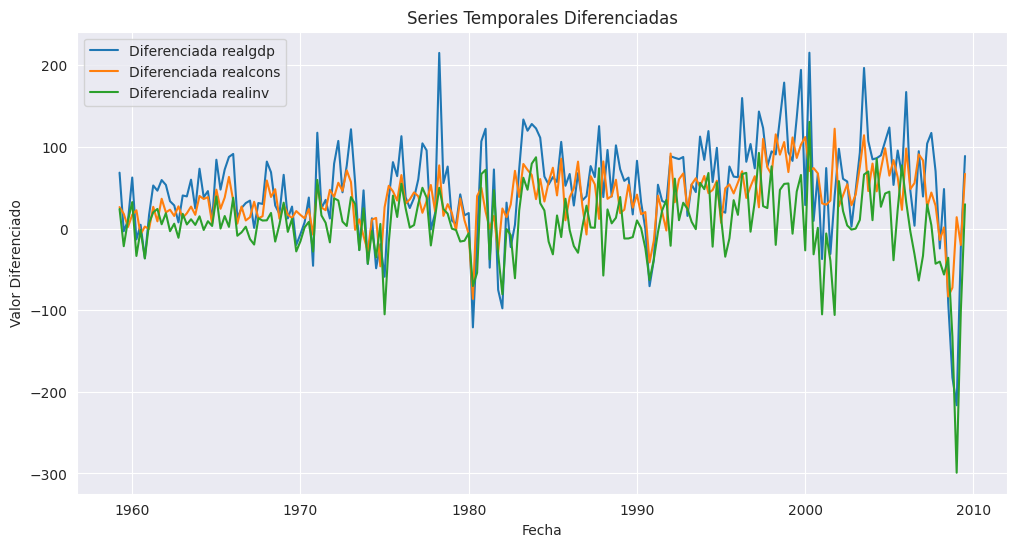

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style('darkgrid')

# Graficar las series temporales diferenciadas
plt.figure(figsize=(12, 6))

for col in diff_data.columns:
    plt.plot(diff_data.index, diff_data[col], label=f'Diferenciada {col}')

plt.title('Series Temporales Diferenciadas')
plt.xlabel('Fecha')
plt.ylabel('Valor Diferenciado')
plt.legend()
plt.show()


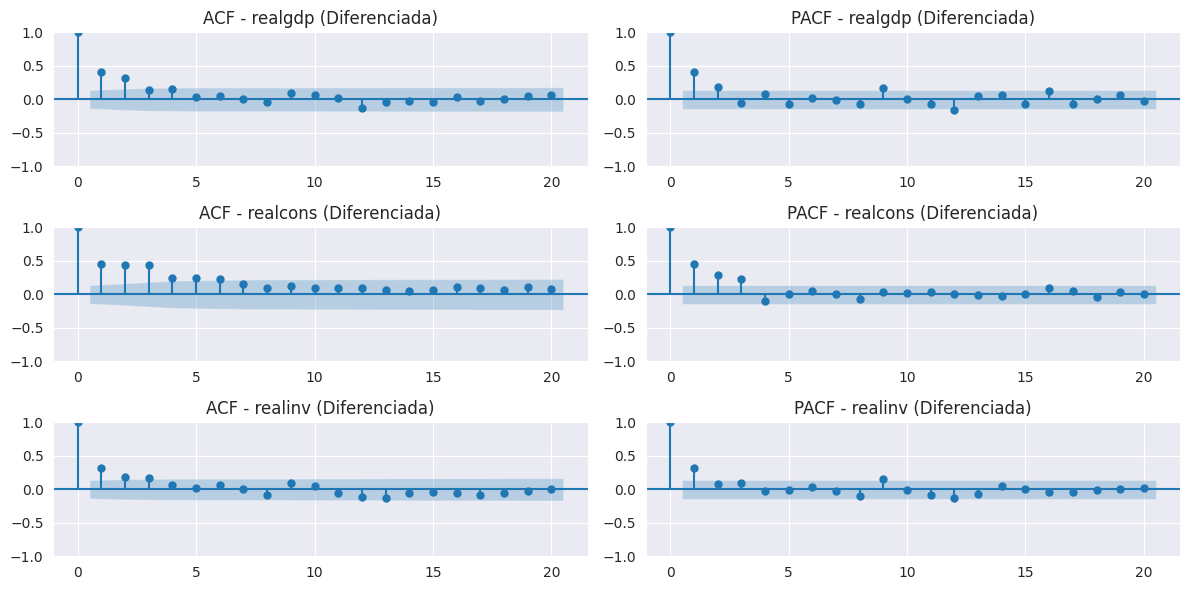

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar correlograma de autocorrelación para series diferenciadas
fig, axes = plt.subplots(nrows=len(diff_data.columns), ncols=2, figsize=(12, 2 * len(diff_data.columns)))

for i, col in enumerate(diff_data.columns):
    plot_acf(diff_data[col], ax=axes[i, 0], lags=20, title=f'ACF - {col} (Diferenciada)')
    plot_pacf(diff_data[col], ax=axes[i, 1], lags=20, title=f'PACF - {col} (Diferenciada)')

plt.tight_layout()
plt.show()


In [41]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

In [42]:
# Crear un modelo VAR
model_var = sm.tsa.VAR(train)

In [43]:
# Ajustar el modelo VAR con un orden de rezago óptimo (puede ajustar este valor)
order_var = model_var.select_order()
model_var_fitted = model_var.fit(maxlags=order_var.aic)

In [44]:
# Imprimir la información sobre el modelo VAR
print(model_var_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Oct, 2023
Time:                     03:04:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.4596
Nobs:                     160.000    HQIC:                   19.2199
Log likelihood:          -2184.57    FPE:                1.88794e+08
AIC:                      19.0560    Det(Omega_mle):     1.66034e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              91.110405        25.761716            3.537           0.000
L1.realgdp          0.573321         0.175263            3.271           0.001
L1.realcons         1.075266         0.203010            5.297    

In [45]:
# Generar pronósticos con el modelo VAR
forecast_var = model_var_fitted.forecast(train.values, steps=len(test))

In [46]:
# Generar pronósticos con el modelo VAR
forecast_var = model_var_fitted.forecast(train.values, steps=len(test))

In [47]:
forecast_var

array([[10828.6992432 ,  7292.80204544,  1852.23858944],
       [10968.94792152,  7389.05307956,  1889.69353913],
       [11109.53875134,  7485.84450814,  1926.88393525],
       [11251.75178975,  7584.43987211,  1963.65253353],
       [11396.41696782,  7684.97459139,  2000.8238238 ],
       [11543.88976867,  7787.610961  ,  2038.60277193],
       [11694.37906955,  7892.43615299,  2077.11938696],
       [11848.0243931 ,  7999.52229533,  2116.44035188],
       [12004.93790292,  8108.93308102,  2156.61131191],
       [12165.22005362,  8220.72972093,  2197.66771448],
       [12328.96655909,  8334.97287629,  2239.64056722],
       [12496.27140623,  8451.72360645,  2282.55872065],
       [12667.22828739,  8571.04379102,  2326.44995384],
       [12841.93134713,  8692.99635273,  2371.34150937],
       [13020.47562782,  8817.6453908 ,  2417.26039514],
       [13202.95737234,  8945.05627468,  2464.23357655],
       [13389.47425282,  9075.2957186 ,  2512.28811321],
       [13580.12555621,  9208.4

In [30]:
# Crear un DataFrame para los pronósticos
forecast_var_df = pd.DataFrame(forecast_var, index=test.index, columns=test.columns)

In [31]:
forecast_var_df

,realgdp,realcons,realinv
date,,,
1999-07-01,10828.699243,7292.802045,1852.238589
1999-10-01,10968.947922,7389.053080,1889.693539
2000-01-01,11109.538751,7485.844508,1926.883935
2000-04-01,11251.751790,7584.439872,1963.652534
2000-07-01,11396.416968,7684.974591,2000.823824
2000-10-01,11543.889769,7787.610961,2038.602772
2001-01-01,11694.379070,7892.436153,2077.119387
2001-04-01,11848.024393,7999.522295,2116.440352
2001-07-01,12004.937903,8108.933081,2156.611312


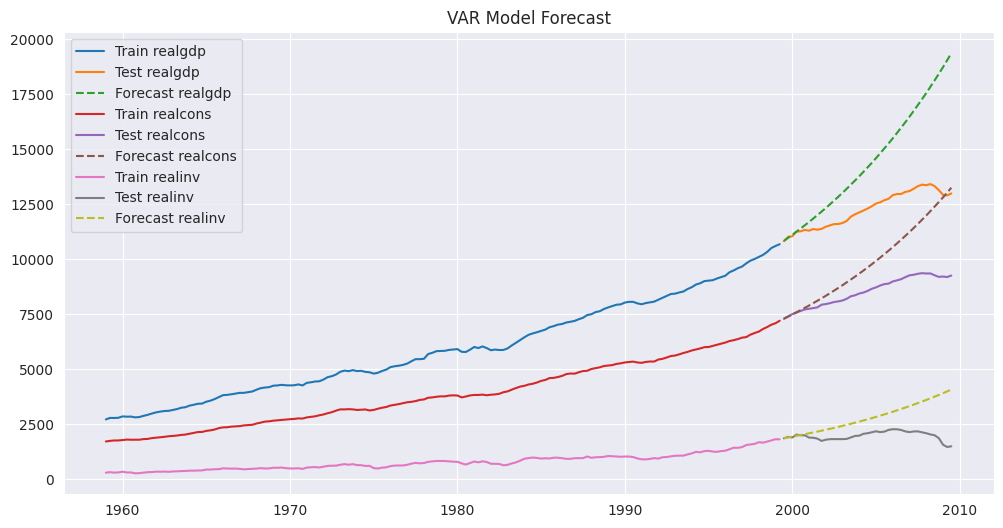

In [32]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
for col in data.columns:
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_var_df.index, forecast_var_df[col], label=f'Forecast {col}', linestyle='dashed')

plt.title('VAR Model Forecast')
plt.legend()
plt.show()

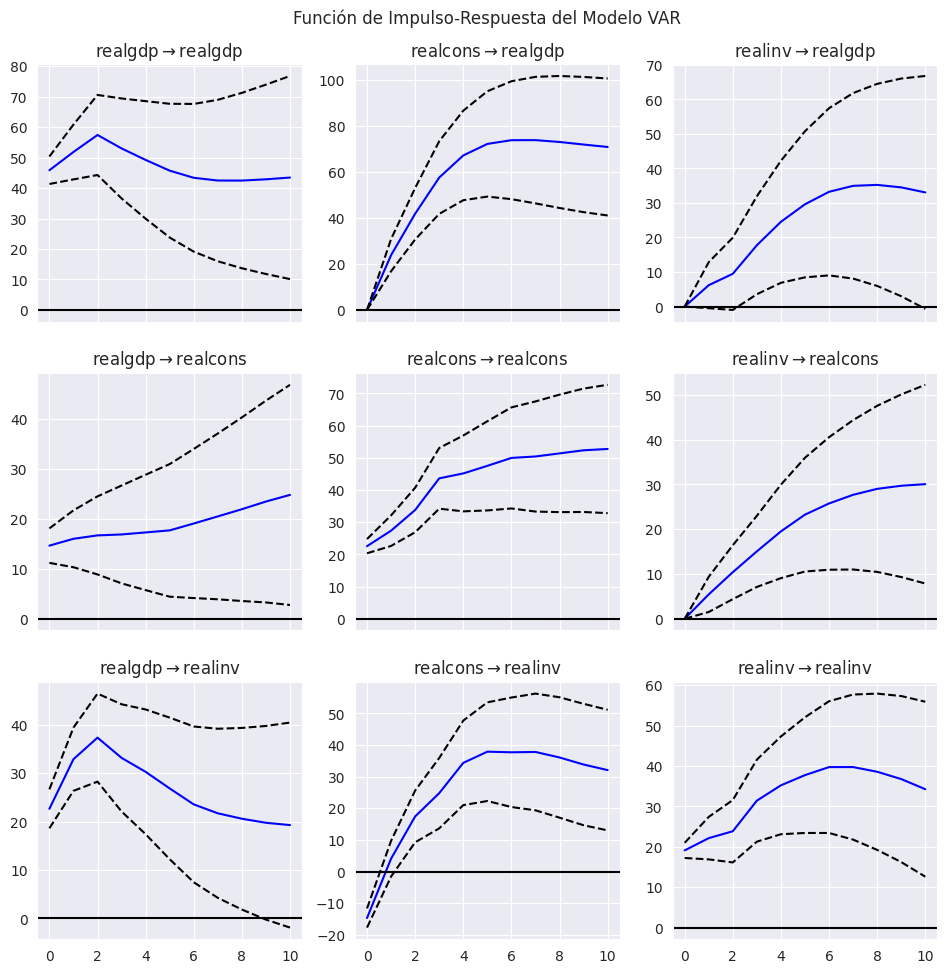

In [48]:
from statsmodels.tsa.api import VAR

# Ajustar un modelo VAR a las series temporales originales
model_var = VAR(data)
order_var = model_var.select_order()
model_var_fitted = model_var.fit(maxlags=order_var.aic)

# Graficar la función de impulso-respuesta
irf = model_var_fitted.irf(10)  # Puedes ajustar el número de pasos hacia adelante (en este caso, 10)
irf.plot(orth=True)
plt.suptitle('Función de Impulso-Respuesta del Modelo VAR')
plt.show()


La función de impulso-respuesta (IRF, por sus siglas en inglés) es una herramienta importante en el análisis de modelos VAR (Vector AutoRegressive) y otros modelos de series temporales. La IRF proporciona información sobre cómo una serie temporal responde, en términos de cambios en sus valores, a choques o impulsos en otra serie temporal.

En el contexto de un modelo VAR, la función de impulso-respuesta responde a preguntas como:

1. **Impacto de un Choque:** ¿Cómo afecta un aumento repentino en una variable a las otras variables del sistema en los siguientes periodos?

2. **Temporalidad de la Respuesta:** ¿Cuántos periodos tarda la respuesta en alcanzar su máximo o mínimo después de un choque inicial?

3. **Persistencia de los Efectos:** ¿Cuánto tiempo persisten los efectos del choque en las variables del sistema?

La interpretación de la IRF ayuda a comprender la dinámica del sistema y cómo las variables se influencian mutuamente en el tiempo. Además, puede ser útil para realizar análisis de escenarios y evaluar la robustez del sistema ante diferentes shocks.

En términos más técnicos, la IRF se calcula exponiendo el sistema a un impulso unitario en una variable específica y observando cómo evolucionan las otras variables a lo largo del tiempo. Esto se realiza iterativamente para cada variable del sistema.

En el código anterior, `irf.plot(orth=True)` muestra la IRF después de ajustar un modelo VAR a las series temporales originales. La opción `orth=True` realiza la ortogonalización, lo que significa que los efectos de las variables se muestran de forma independiente, eliminando las correlaciones contemporáneas entre las variables en las respuestas al impulso.

En resumen, la función de impulso-respuesta es una herramienta valiosa para analizar la dinámica y las interacciones en sistemas multivariables a lo largo del tiempo.